<a href="https://colab.research.google.com/github/Dhee2211/ML/blob/main/classifying_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#this coolab exercise is to classify images from fashion MNIST dataset 
#Install helper libraries
!pip install -U tensorflow_datasets


In [2]:
import tensorflow as tf 

In [3]:
#import tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#helper libraries 
import math 
import numpy as np
import matplotlib.pyplot as plt

#import logging
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
#preparing datasets for training and testing model
dataset, metadata = tfds.load('fashion_mnist' ,as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [5]:
class_name = metadata.features['label'].names
print(f"Class names: {class_name}")

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
#find number of examples in training data and testing data 
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(f"Number of train examples: {num_train_examples}")
print(f"Number of train examples: {num_test_examples}")

Number of train examples: 60000
Number of train examples: 10000


In [7]:
#processing the data 
def normalize(images, labels):
  images = tf.cast(images,tf.float32)
  images /= 255 
  print(images)
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#the first time you load the dataset, the images will be loaded from the disk
#caching will keep them in the memory, making training faster 

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()


Tensor("truediv:0", shape=(28, 28, 1), dtype=float32)
Tensor("truediv:0", shape=(28, 28, 1), dtype=float32)


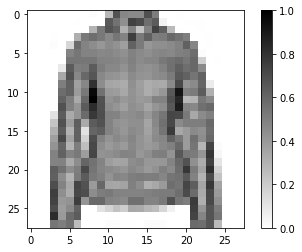

In [8]:
#explore the processed data 
#take a single image, and remove the color dimension by reshaping 

for image, label in test_dataset.take(1):
  break 
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

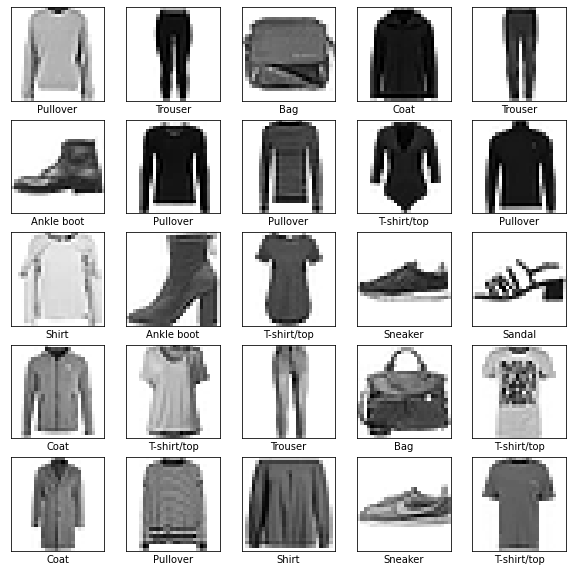

In [9]:
plt.figure(figsize= (10,10))
for i , (image, label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_name[label])
plt.show()

In [10]:
#build the model 
#setup the layers 
model = tf.keras.Sequential([ 
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation= tf.nn.softmax)
]
)

In [11]:
#model complilation 
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics =['accuracy'])


In [12]:
#this time we will train our model in batch 
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/10
1875/1875 [==============================] - 24s 4ms/step - loss: 0.4913 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3750 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3341 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3116 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2903 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2814 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2630 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2587 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2453 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

In [13]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on the dataset :' ,test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.3230 - accuracy: 0.8859
Accuracy on the dataset : 0.8859000205993652


In [14]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [15]:
predictions.shape

(32, 10)

In [35]:
predictions[0]

array([3.1412087e-06, 1.3979012e-07, 7.5445399e-03, 3.6391672e-08,
       9.5540065e-01, 2.3094343e-12, 3.7050240e-02, 1.5720786e-09,
       8.8604139e-07, 3.7467436e-07], dtype=float32)

In [34]:
np.argmax(predictions[9])

4

In [31]:
test_labels[0]

4

In [32]:
class_name[4]

'Coat'

In [20]:

def plot_image(i,predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel =("{} {:2.0f}% ({})".format(class_name[predicted_label],100*np.max(predictions_array),class_name[true_label]))
  

def plot_value_array(i, predictions_array, true_label):
  predictions_array , true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

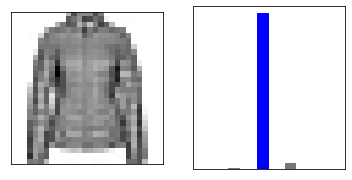

In [21]:
i = 0 
plt.figure(figsize =(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)


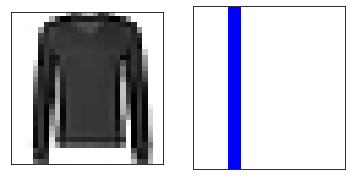

In [22]:
#for 12 items
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

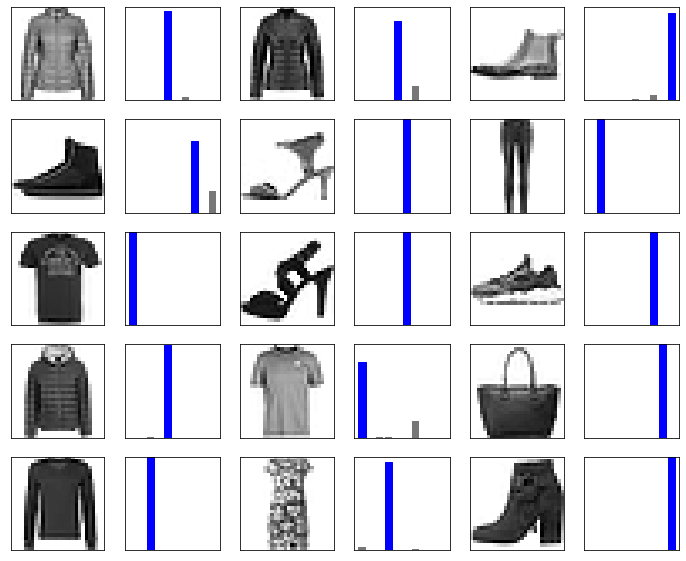

In [23]:
#plot the first x test images 
#color correct prediction in blue , incorrect predictions in red
num_rows = 5 
num_cols = 3 
num_images =  num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_rows*num_cols):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [24]:
# Take an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [25]:
img= np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [26]:
predict_single = model.predict(img)
print(predict_single)

[[3.1412028e-06 1.3978986e-07 7.5445292e-03 3.6391739e-08 9.5540065e-01
  2.3094254e-12 3.7050150e-02 1.5720697e-09 8.8604054e-07 3.7467331e-07]]


4

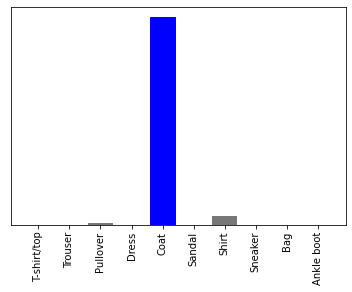

In [27]:
plot_value_array(0, predict_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=90)
np.argmax(predict_single[0])
